<a href="https://colab.research.google.com/github/yj9889/ESAA2/blob/main/220321%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **핸즈온 머신러닝 - 04. 모델 훈련** 
##### 2022.03.21.

# [개념정리] & [필사]

> ## 4.1 선형 회귀

* 입력 특성의 가중치 합&편향(절편)으로 선형 회귀 모델 생성

* 선형 회귀 모델을 훈련시키려면 RMSE(MSE)를 최소화하는 θ(편향 θ0과 θ1에서 θn까지의 특성 가중치를 담은 모델의 파라미터 벡터)를 찾아야 함.


>> ## 4.1.1 정규 방정식

* 비용함수를 최소화하는 θ값을 찾기 위한 해석적인 방법


In [6]:
import numpy as np
import os

X = 2 * np.random.rand(100,1) # 선형처럼 보이는 데이터 생성
y = 4 + 3 * X + np.random.randn(100,1)

* *np.linalg.inv()* 함수: 역행렬 계산
* T 속성: 전치행렬을 가리킴.
* *dot()* 메서드: 행렬 곱셈

  * y = 4 + 3X1 + 가우시안 잡음

In [2]:
X_b = np.c_[np.ones((100, 1)), X] # 모든 샘플에 x0 = 1을 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best

array([[4.1589055 ],
       [2.86812114]])

In [3]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # 모든 샘플에 x0 = 1을 추가
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.1589055 ],
       [9.89514779]])

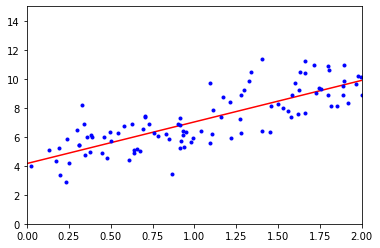

In [5]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

* 사이킷런에서 선형 회귀 수행

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.89173023]), array([[3.16553024]]))

In [8]:
lin_reg.predict(X_new)

array([[ 3.89173023],
       [10.2227907 ]])

* 유사역행렬: X+는 X의 유사역행렬
  * *np.linalg.pinv()* 함수로 구현

* 특잇값 분해(SVD): 표준 행렬 분해 기법
  * *LinearRegression.fit()* 함수로 구현

In [9]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[ 7.79746083],
       [-0.5387992 ]])

In [10]:
np.linalg.pinv(X_b).dot(y)

array([[ 7.79746083],
       [-0.5387992 ]])

>> ## 4.1.2 계산 복잡도

* 역행렬을 계산하는 계산 복잡도는 O(n^2.4)~O(n^3) 사이
  * 특성 수가 2배 늘어나면 계산 시간이 5.3~8배 증가

* LinearRegression 클래스가 사용하는 SVD 방법은 약 O(n^2)
  * 특성 수가 2배 늘어나면 계산 시간이 4배 증가


> ## 4.2 경사 하강법
* 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해 가는 것.
  * θ에 대해 비용 함수의 현재 그래디언트를 계산하거나 무작위 초기화시키고, 그래디언트를 감소하는 방향으로 진행해 0이 되면 최솟값에 도달.
  * 학습률 하이퍼파라미터: 스텝의 크기를 결정. 학습률이 작으면 알고리즘이 수렴하기 위한 반복 시간이 많이 걸림.

* MSE 비용함수: 지역 최솟값이 없고 하나의 전역 최솟값만 존재하는 볼록함수, 연속함수, 기울기 급변X
  * 파라미터 공간에서 비용함수를 최소화하는 모델 파라미터의 조합을 찾는 모델 훈련을 할 때, 모델이 가진 파라미터의 수가 많을수록 공간의 차원은 커지고 검색이 어려워진다.

>> ## 4.2.1 배치 경사 하강법

* 편도 함수: 각 모델 파라미터θj에 대해 비용 함수의 그래디언트 계산.(MSE(θ)를 j에 대해 미분)

  * *eta*: 학습률 0.1
  * *n_iterations*: 에포크 수 1000

In [12]:
eta = 0.1  # 학습률
n_iterations = 1000 # 에포크 수

# 무작위로 생성한 100개의 샘플 수
m = 100

# theta0, theta1 파라미터 임의로 초기값 지정
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
  

theta # 정규방정식으로 찾은 것과 동일.

array([[ 7.79746083],
       [-0.5387992 ]])

* 반복 횟수를 아주 크게 지정하고 그래디언트 벡터가 아주 작아지면, 즉 벡터의 노름이 어떤 값 ε(=허용오차)보다 작아지면 경사하강법이 최솟값에 도달했으므로 알고리즘 중지. 

>> ## 4.2.2 확률적 경사 하강법

* 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그래디언트를 계산.
  * 매 반복에서 다뤄야 할 데이터가 매우 적어 한 번에 하나의 샘플을 처리하면 알고리즘이 훨씬 빨라지고 큰 훈련 세트도 훈련시킬 수 있음.

* 배치경사하강법과 비교
  * cons: 확률적(무작위)이라서 배치경사하강법보다 불안정.
  * pros: 비용 함수가 매우 불규칙할 경우 알고리즘이 지역 최솟값을 건너뛸 수 있도록 하므로 배치 경사하강법보다 전역 최솟값을 찾을 가능성 높음.
  * 해결: 학습률을 점진적으로 감소시킴. 담금질 기법 알고리즘과 유사.

* 학습 스케줄: 매 반복에서 학습률을 결정하는 함수.
  * 학습률이 너무 빨리 줄어들면, 지역 최솟값에 갇히거나 가는 중간에 멈춤
  * 학습률이 너무 천천히 줄어들면, 오랫동안 최솟값 주변을 맴돌거나 훈련을 너무 일찍 중지해 지역 최솟값에 머무르게 됨


In [13]:
n_epochs = 50

# 학습 스케줄
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

# 파라미터 초기값
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
      # 샘플 무작위 선택
        random_index = np.random.randint(m) 
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        
        # 그레이디언트 계산
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        # 학습률 조정
        eta = learning_schedule(epoch * m + i)
        # 파라미터 조정
        theta = theta - eta * gradients

* 에포크: 훈련 세트에 있는 샘플 수 만큼 반복되는데, 이때 각 반복을 의미.

In [14]:
theta

array([[ 7.82694508],
       [-0.52654536]])

* 사이킷런 SGDRegressor
  * *max_iter=1000*: 에포크 수 1000번으로 제한.
  * *tol=1e-3*: 허용 오차는 0.001.
  * *eta0=0,1* SGDRegressor가 사용하는 학습 스케줄 함수에 사용되는 매개 변수. 이전과는 다른 학습률
  * *penalty=None*: 규제를 사용하지 않음

In [18]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [19]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.79955663]), array([3.10412798]))

>> ## 4.2.3 미니배치 경사 하강법

* 각 스탭에서 전체 훈련 세트나 하나의 샘플을 기반으로 그래디언트를 계산하는 것이 아니라 미니배치라 부르는 임의의 작은 샘플에 대해 그래디언트 계산.
  * 장점: 행렬연산에 최적화된 하드웨어, GPU를 사용하여 얻는 성능 향상.
  * SGD보다 덜 불규칙해 최솟값에 더 가까이 도달하지만 지역 최솟값에서 빠져나오기 힘들 수 있음.(지역 최솟값이 문제되는 경우)

> ## 4.3 다항 회귀

* 비선형 데이터의 각 특성의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는 것.


In [20]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

X[0]

array([2.21405451])

In [22]:
X_poly[0]

array([2.21405451, 4.90203739])

* 사이킷런의 PolynomialFeatures: 변환기가 주어진 특성들의 거듭제곱과 특성들 사이의 곱셈을 실행하여 특성을 추가하는 기능을 제공

In [23]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

lin_reg.intercept_, lin_reg.coef_

(array([2.08560923]), array([[0.98128007, 0.50250706]]))

> ## 4.4 학습 곡선

* 훈련 세트와 검증 세트의 모델 성능을 훈련ㅅ ㅔ트 크기(또는 훈련 반복)의 함수로 나타냄.
  * 훈련 세트에서 크기가 다른 서브 세트를 만들어 모델을 여러 번 훈련시킴.

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    # 훈련 세트와 검증 세트로 분리 (8대 2)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    # 평균 제곱근 오차 기억 리스트
    train_errors, val_errors = [], []
    
    # 총 len(X_train) 번 학습 반복
    # 반복할 때마다 훈련 세트의 크기가 1씩 커진다.
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        # 훈련 세트와 검증 세트에 대한 예측
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        # 훈련 세트와 검증 세트에 대한 평균 제곱근 오차 계산 후 기억 리스트에 추가
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    # 평균 제곱근 오차 그래프 그리기
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="훈련 세트")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="검증 세트")

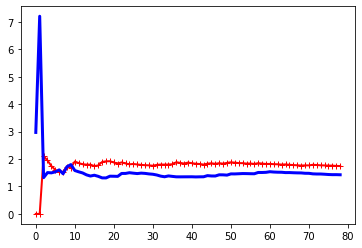

In [28]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y) # 단순 선형 회귀 모델의 학습 곡선

* 위 그래프: 과소적합된 모델. 곡선이 편평해질 때까지 오차가 계속 상승. 모델에 훈련 샘플이 추가됨에 따라 학습이 되어 검증 오차가 천천히 감소.

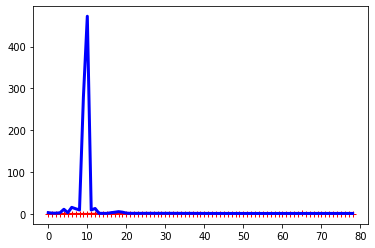

In [31]:
from sklearn.pipeline import Pipeline
# 10차 다항 회귀 모델의 학습 곡선
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)

* 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮음.
* 두 곡선 사이의 공간 - 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 낫다.(과대적합 모델의 특징)

* 편향/분산 트레이드오프 - 모델의 일반화 오차는 세 오차의 합으로 표현
  * 편향: 잘못된 가정으로 인해 생김. 편향 크면 과소적합
  * 분산: 훈련 데이터의 작은 변동에 모델이 민감하기 때문에 나타남. 자유도가 높으면 높은 분산 가져 훈련 데이터에 과대적합.
  * 줄일 수 없는 오차: 데이터에서 잡음 제거
  * 모델의 복잡도 커지면 분산 늘어나고 편향 줄어듦.

> ## 4.5 규제가 있는 선형 모델
* 다항식의 차수를 감소시킴(모델의 가중치를 제한)

>> ## 4.5.1 릿지 회귀
* 규제항이 추가된 선형 회귀 버전.
  * 모델의 가중치가 가능한 한 작게 유지되도록 노력. 
  * 규제항은 훈련하는 동안에만 비용함수에 추가됨.(성능지표도 규제가 없는 모델로 평가)
* 하이퍼파라미터 α=0: 선형회귀와 같은 릿지 회귀
  * α가 아주 크면, 모든 가중치가 0에 가까워지고 평균을 지나는 수평선이 됨.

In [34]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)

# 릿지 회귀 - 예측 예제
ridge_reg.predict([[1.5]])

array([[5.23263332]])

In [33]:
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())

# 확률적 경사하강법 - 예측 예제
sgd_reg.predict([[1.5]])

array([5.21954792])

>> ## 4.5.2 라쏘 회귀
* 릿지 회귀처럼 비용함수에 규제항을 더하지만, l2노름의 제곱을 2로 나눈 것 대신 가중치 벡터의 l1 노름 사용.
  * 덜 중요한 특성의 가중치를 제거하려는 특징.(즉, 가중치가 0이 된다.) = 자동으로 특성을 선택하고 희소 모델 생성.(0이 아닌 특성의 가중치가 적다.)
  * 서브그래디언트백터 g를 사용하면 경사 하강법을 적용하는데 문제가 없다.
  * Lasso 대신 SGDRegressor(penalty="l1") 사용 가능

In [35]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)

# 예측 예제
lasso_reg.predict([[1.5]])

array([5.19405826])

>> ## 4.5.3 엘라스틱넷
* 릿지 회귀와 라쏘 회귀 절충
  * 규제항: 릿지와 회귀 규제항 단순 더함.
    * 혼합 정도: 혼합 비율 r을 사용해 조절(r=0: 릿지회귀, r=1: 라쏘 회귀)
  * 특성 수가 훈련 샘플보다 많거나 특성 몇 개가 강하게 연관되어 있을 때는 보통 라쏘가 문제를 일으키므로 라쏘보다 엘라스틱넷 선호.

In [36]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)

# 예측 예제
elastic_net.predict([[1.5]])

array([5.19256695])

>> ## 4.5.4 조기 종료
* 검증 에러가 최솟값에 도달하면 바로 훈련 중지시킴. 

In [40]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# 확률적 경사 하강법 모델 설정. 규제 없음.
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

# 최대 1000번까지 전체 훈련 데이터 대상 학습을 반복하면서 평균 제곱근 오차(RMSE)가 작아질 때마다 
# 최소 RMSE 와 반복 횟수(에포크), 그리고 최고 성능의 모델 파라미터를 기억한다. 
# 최종적으로 가장 성능이 좋은 훈련 세트를 기억함. 
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # 중지된 곳에서 다시 시작합니다
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        # 베스트 모델 복제해서 기억해두기
        best_model = clone(sgd_reg)

> ## 4.6 로지스틱 회귀
* 샘플이 특정 클래스에 속할 확률을 추정.
  * 양성 클래스: 레이블이 '1'
  * 음성 클래스: 레이블이 '0'

>> ## 4.6.1 확률 추정
* 선형 회귀 모델과 같이 로지스틱 회귀 모델은 입력 특성의 가중치 합을 계산하고 편향을 더한다. 대신, 바로 결과를 출력하지 않고 결과값의 로지스틱을 출력.
* 로지스틱은 0과 1 사이의 값을 출력하는 시그모이드 함수(S자 형태)

>> ## 4.6.2 훈련과 비용 함수
* 훈련의 목적: 양성 샘플(y=1)에 대해 높은 확률을 추정, 음성 샘플(y=0)에 대해 낮은 확률을 추정하는 모델의 파라미터 벡터 θ를 찾는 것.
* 비용 함수의 최솟값을 계산하는 알려진 해가 없으나 볼록함수이므로 경사하강법 또는 이 전역 최솟값을 찾는 것을 보장한다.



>> ## 4.6.3 결정 경계

In [41]:
from sklearn import datasets
iris = datasets.load_iris() #사전 자료형으로 가져옴
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [42]:
# 꽃잎 너비만 특성으로 사용
X = iris["data"][:, 3:]

# Iris virginica이면 1 아니면 0
y = (iris["target"] == 2).astype(np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


In [43]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

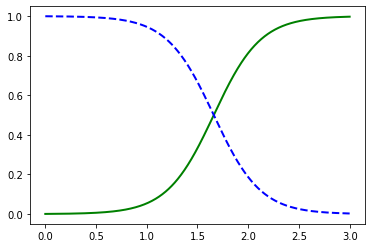

In [44]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

In [45]:
log_reg.predict([[1.67], [1.66]])

array([1, 0])

>> ## 4.6.4 소프트맥스 회귀=다항 로지스틱 회귀
* 로지스틱 회귀 모델은 여러 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화활 수 있음.
  * 샘플 x가 주어지면 소프트맥스 회귀 모델이 각 클래스 k에 대한 점수 Sk(x)를 계산하고, 그 점수에 소프트맥스 함수를 적용해 각 클래스의 확률 추정. 각 클래스는 자신만의 파라미터 벡터 θ(k)가 있는데, 이들은 파라미터 행렬에 행으로 저장된다.
  * *argmax*: 함수를 최대화하는 변수의 값 반환.
* 크로스 엔트로피
  * 추정된 클래스의 확률이 타깃 클래스에 얼마나 잘 맞는지 측정하는 용도
* multi_class 변수를 "multinomial"로 바꾸면 소프트맥스 회귀 사용 가능.

In [46]:
# 꽃잎 길이, 꽃잎 너비 정보는 `data` 키의 값에서 2번, 3번 열에 들어 있다.
X = iris["data"][:, (2, 3)]
# 타깃
y = iris["target"]

# 소프트맥스 회귀 모델 학습
softmax_reg = LogisticRegression(multi_class="multinomial",
                                 solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [47]:
softmax_reg.predict([[2.6, 3]])

array([1])

In [48]:
softmax_reg.predict_proba([[2.6, 3]]) # 모두 0.5보다 작다

array([[0.39029691, 0.43096385, 0.17873924]])